# MVP Análise de Dados e Boas Práticas

**Nome:** Diego Henrique Paz Zuzu

**Matrícula:** 4052025000149

**Dataset:** [Banknote Authentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication)


# Descrição do Problema

Este dataset busca resolver um problema de detecção de falsificação de cédulas bancárias (notas de dinheiro). Ele contém atributos extraídos de imagens digitalizadas de cédulas, e o objetivo é identificar se a nota é verdadeira ou falsa com base nessas características.

## Hipóteses/Premissas

As hipóteses que tracei são as seguintes:

- As características extraídas da imagem (como variância, curtose etc.) são suficientes para distinguir entre uma nota verdadeira e uma falsa.

- A imagem da nota foi processada da mesma forma para todas as instâncias.

## Restrições/Condições

- Os dados foram coletados a partir de imagens convertidas usando uma técnica chamada wavelet transform.

- Todas as variáveis são numéricas e já extraídas automaticamente do processamento da imagem.

## Tipo de Problema

É um problema de aprendizado supervisionado, pois temos um rótulo conhecido (classe 0 ou 1) que indica se a nota é verdadeira ou falsa.

## Seleção de Dados

O dataset Banknote Authentication é um conjunto de dados amplamente reconhecido e frequentemente utilizado em aprendizado de máquina. Ele está disponível em bibliotecas populares, como o scikit-learn em Python, e por ser bem estruturado e consistente, ele pode ser aplicado diretamente em tarefas de classificação binária, como a distinção entre cédulas autênticas e falsas.

## Atributos do Dataset

O dataset Banknote Authentication contém 5 colunas:

- ***variance*** Variância da imagem da nota (método estatístico que indica dispersão)
- ***skewness*** Assimetria da distribuição dos dados da imagem
- ***curtosis*** Curtose da imagem (grau de concentração dos dados em torno da média)
- ***entropy*** Entropia da imagem (medida de aleatoriedade ou imprevisibilidade)
- ***class*** Classe alvo: 0 = nota verdadeira, 1 = nota falsa

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Banknote Authentication.

In [48]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [49]:
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

In [50]:
#Imprime primeiras 10 linhas
print("Features (X):")
print(X.head(10))

print("\n Targets (y):")
print(y.head(10))

Features (X):
   variance  skewness  curtosis  entropy
0   3.62160    8.6661  -2.80730 -0.44699
1   4.54590    8.1674  -2.45860 -1.46210
2   3.86600   -2.6383   1.92420  0.10645
3   3.45660    9.5228  -4.01120 -3.59440
4   0.32924   -4.4552   4.57180 -0.98880
5   4.36840    9.6718  -3.96060 -3.16250
6   3.59120    3.0129   0.72888  0.56421
7   2.09220   -6.8100   8.46360 -0.60216
8   3.20320    5.7588  -0.75345 -0.61251
9   1.53560    9.1772  -2.27180 -0.73535

 Targets (y):
   class
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


# Análise de Dados

Esta etapa de Análise Exploratória de Dados (EDA) do dataset Banknote Authentication tem como objetivo examinar estatísticas descritivas, distribuições e correlações entre as variáveis. Esses insights são essenciais para orientar o pré-processamento e a seleção de algoritmos de classificação.

## Total e Tipo das Instâncias

O dataset Banknote Authentication possui 5 atributos (4 preditores + 1 alvo) e 1372 instâncias. Todas as variáveis são do tipo numérico contínuo, exceto a class, que é categórica (0 ou 1).

In [51]:
import pandas as pd

# Baixar e carregar o dataset Banknote Authentication
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
# Definir os nomes das colunas (conforme a descrição do dataset)
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Carregar o dataset em um DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Imprimir o total de instâncias
print(f"Total de instâncias: {len(df)}")

# Imprimir os tipos de dados por coluna
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 1372

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


/tmp/ipython-input-52-199950865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


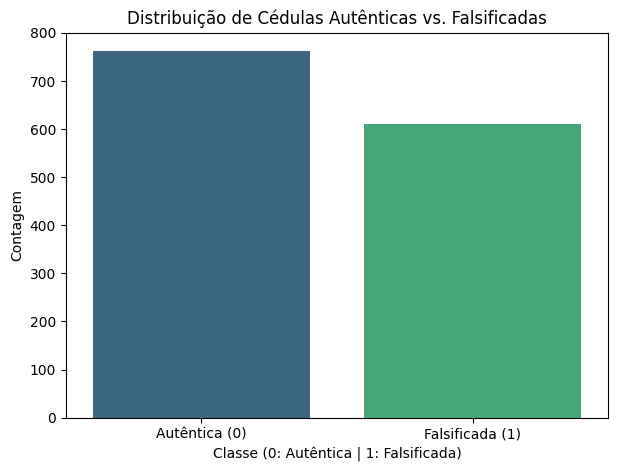

In [52]:
# Configurar o estilo do gráfico
plt.figure(figsize=(7, 5))

# Gráfico de barras para a distribuição das classes (0 = autêntica, 1 = falsificada)
sns.countplot(x='class', data=df, palette='viridis')

# Personalizar o gráfico
plt.title('Distribuição de Cédulas Autênticas vs. Falsificadas')
plt.xlabel('Classe (0: Autêntica | 1: Falsificada)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Autêntica (0)', 'Falsificada (1)'])  # Melhorar os rótulos do eixo X

# Mostrar o gráfico
plt.show()

Conforme a análise de dados, as cédulas autênticas correspondem a 55,5% do total (762 amostras), e a quantidade de cédulas falsificadas correspondem a 44.5% do total (610 amostras).
O dataset não está perfeitamente balanceado, mas o desbalanceamento é moderado (diferença de ~11%).



## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [53]:
# estatísticas descritivas básicas do dataset
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [54]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
variance,0.433735
skewness,1.922353
curtosis,1.397627
entropy,-1.191657
class,0.444606


### Média por Classe (Autêntica vs. Falsificada)

A média por classe é uma medida estatística que calcula a média de um conjunto de dados que foram organizados em classes ou intervalos. Ao invés de tratar cada valor individualmente, calcula-se a média de cada classe e depois se combina essas médias ponderadas pela frequência de cada classe.

In [55]:
medias_por_classe = df.groupby('class').mean()
print("\nMédias por classe (0: Autêntica | 1: Falsificada):\n", medias_por_classe)


Médias por classe (0: Autêntica | 1: Falsificada):
        variance  skewness  curtosis   entropy
class                                        
0      2.276686  4.256627  0.796718 -1.147640
1     -1.868443 -0.993576  2.148271 -1.246641


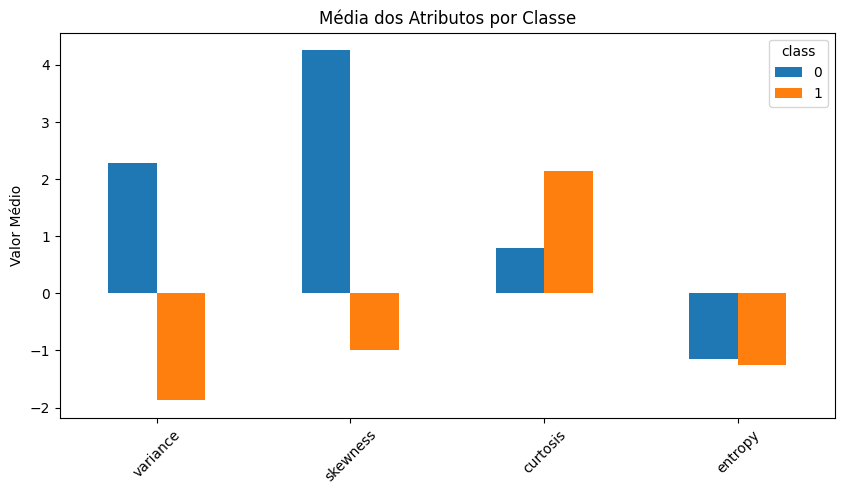

In [56]:
# Gráfico comparando as médias por classe

medias_por_classe.T.plot(kind='bar', figsize=(10, 5))  # Transposta (.T) para melhor visualização
plt.title('Média dos Atributos por Classe')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.show()

O gráfico gerado destaca, para variance e skewness, as barras das classes estao em direções opostas (positivo vs. negativo), reforçando a inversão de padrões entre autênticas e falsas. Para curtosis, a barra é maior para falsificadas, indicando distribuições mais achatadas. Para entropy, as Barras quase sobrepostas, confirmando sua irrelevância relativa.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [57]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
variance,2.842763
skewness,5.869047
curtosis,4.310030
entropy,2.101013
class,0.497103


/tmp/ipython-input-58-4102202190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=std_dev.index, y=std_dev.values, palette="viridis")


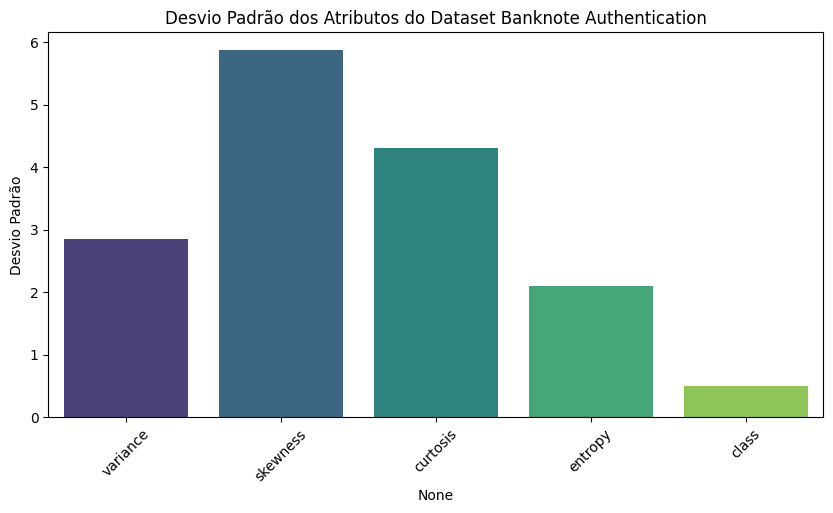

In [58]:
# Gráfico comparativo do desvio padrão dos atributos

std_dev = df.std()
plt.figure(figsize=(10, 5))
sns.barplot(x=std_dev.index, y=std_dev.values, palette="viridis")
plt.title("Desvio Padrão dos Atributos do Dataset Banknote Authentication")
plt.ylabel("Desvio Padrão")
plt.xticks(rotation=45)
plt.show()

O gráfico mostra claramente que skewness tem a maior dispersão, seguida por curtosis.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *skewness*

Como skewness tem a maior dispersão, iremos analisar sua distribuição.

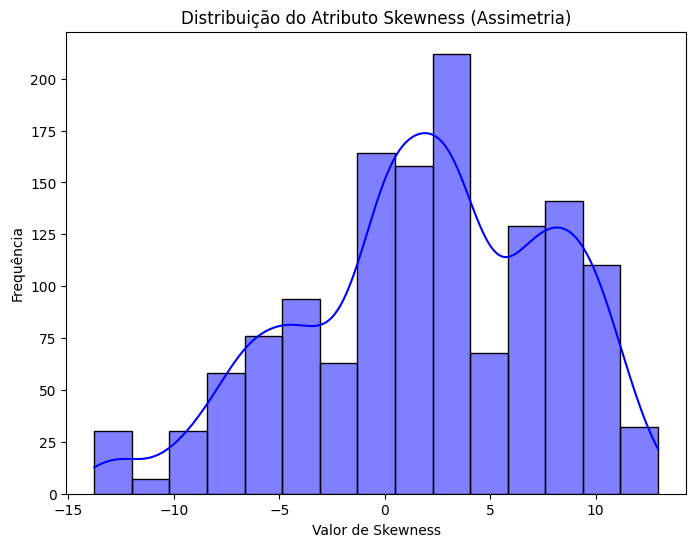

In [59]:
# Configuração do gráfico
plt.figure(figsize=(8, 6))

# Histograma + KDE (Kernel Density Estimation)
sns.histplot(df['skewness'], kde=True, color='blue', bins=15)

# Títulos e labels
plt.title('Distribuição do Atributo Skewness (Assimetria)')
plt.xlabel('Valor de Skewness')
plt.ylabel('Frequência')

plt.show()

O histograma mostra que a maioria das notas tem assimetria próxima a zero (textura uniforme), mas algumas exibem valores extremamente negativos (possíveis fraudes). A presença de outliers sugere que skewness é útil para detectar anomalias, mas deve ser usado em conjunto com outros atributos para maior precisão.

### *curtosis*

Como skewness tem a segunda maior dispersão, iremos analisar sua distribuição.

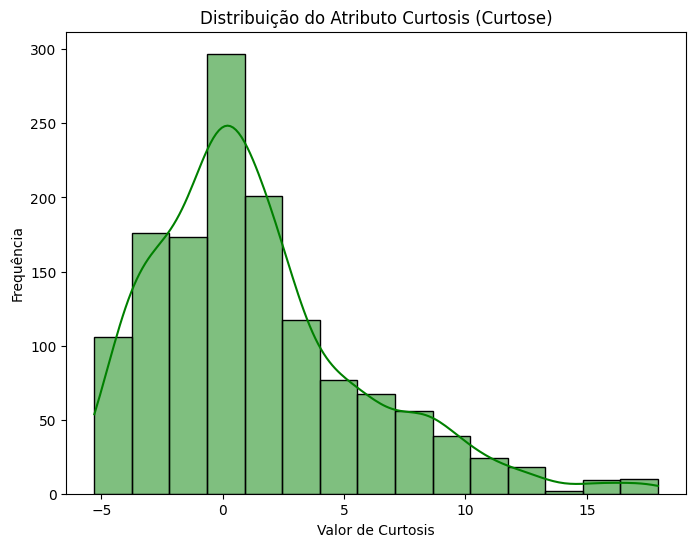

In [60]:
# Configuração do gráfico
plt.figure(figsize=(8, 6))

# Histograma + KDE (Kernel Density Estimation)
sns.histplot(df['curtosis'], kde=True, color='green', bins=15)

# Títulos e labels
plt.title('Distribuição do Atributo Curtosis (Curtose)')
plt.xlabel('Valor de Curtosis')
plt.ylabel('Frequência')

plt.show()

O histograma revela que a maioria das notas tem curtose moderada, mas algumas apresentam valores extremamente altos (cauda direita), possivelmente associados a fraudes. Esses outliers são raros, mas críticos para distinção entre notas autênticas e falsas.

## Boxplot

Criando boxplots para todos os atributos (variance, skewness, curtosis, entropy) separados por classe (0 e 1) será possivel visualizar a dispersão dos dados, identificar outliers, comparar as distribuições entre classes e verificar a sobreposição de valores entre classes

In [61]:
# Estatísticas descritivas agrupadas por classe (0 = autêntica, 1 = falsificada)
desc_stats = df.groupby('class').describe()

# Mostrar as estatísticas descritivas
print("Estatísticas Descritivas Agrupadas por Classe:")
print(desc_stats)

# Opcional: Formatar a exibição para melhor legibilidade
with pd.option_context('display.max_columns', None):
    print("\nEstatísticas Descritivas Formatadas:")
    print(desc_stats.transpose())

Estatísticas Descritivas Agrupadas por Classe:
      variance                                                                 \
         count      mean       std     min       25%     50%      75%     max   
class                                                                           
0        762.0  2.276686  2.019348 -4.2859  0.883345  2.5531  3.88445  6.8248   
1        610.0 -1.868443  1.881183 -7.0421 -3.061450 -1.8061 -0.54177  2.3917   

      skewness            ...  curtosis          entropy                      \
         count      mean  ...       75%      max   count      mean       std   
class                     ...                                                  
0        762.0  4.256627  ...  2.652925   8.8294   762.0 -1.147640  2.125077   
1        610.0 -0.993576  ...  5.626350  17.9274   610.0 -1.246641  2.070984   

                                                    
          min       25%      50%       75%     max  
class                                   

### Atributos por classe


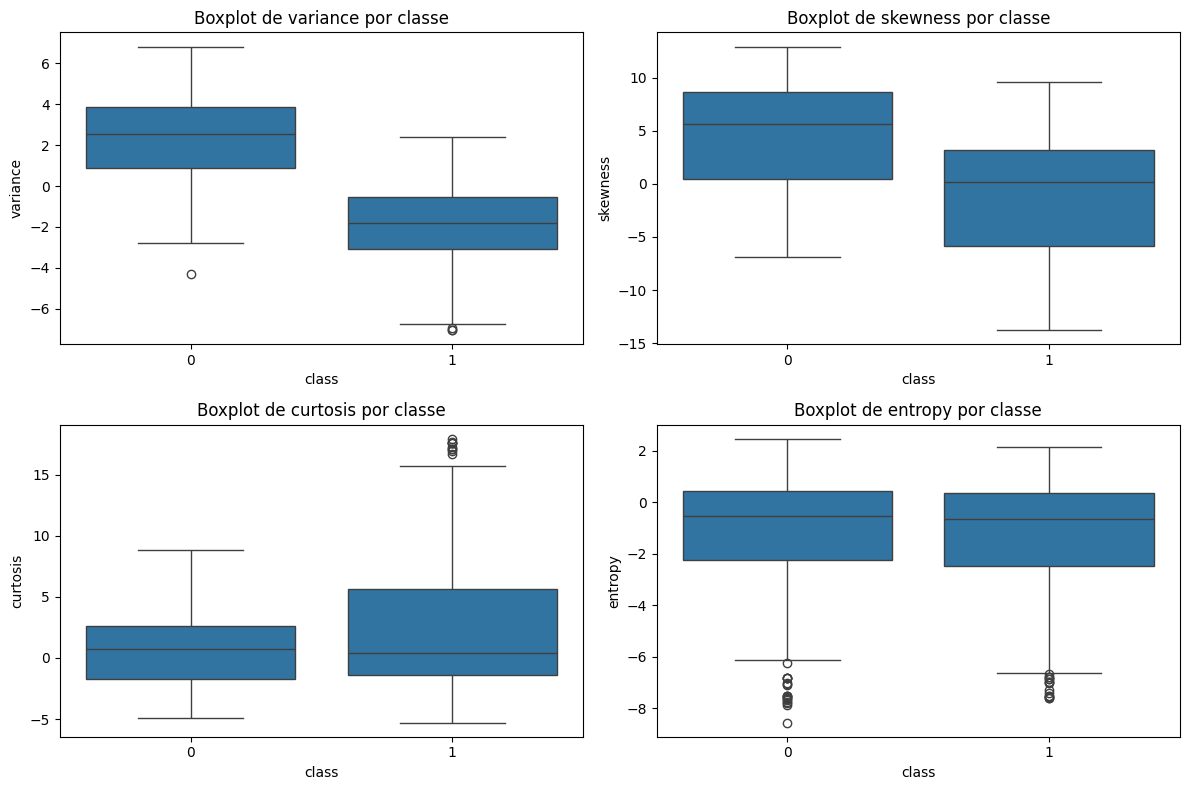

In [62]:
# Boxplot para todos os atributos por classe
plt.figure(figsize=(12, 8))
for i, col in enumerate(['variance', 'skewness', 'curtosis', 'entropy']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot de {col} por classe')
plt.tight_layout()
plt.show()

As medianas (linhas centrais nas caixas) estão em posições nitidamente diferentes para cada classe em todos os atributos, indicando forte poder discriminativo.
O atributo Variance é altamente discriminativo, com pouca sobreposição entre as classes.
O atributo Curtosis possui boa separação, mas com maior dispersão nas falsificadas (caixa mais longa e outliers).
Entropy é diferente dos outros atributos, mas igualmente eficaz para distinção.
Poucos outliers visíveis (pontos isolados), principalmente nas cédulas falsificadas (classe 1), sugerindo que a maioria dos dados está dentro da distribuição esperada.

## Matriz de Correlação

A matriz de correlação é uma tabela que mostra o grau de correlação entre várias variáveis numéricas de um conjunto de dados. Ela mede o quanto duas variáveis variam juntas, ou seja, se uma aumenta quando a outra aumenta (ou diminui).
Cada valor na matriz é chamado de coeficiente de correlação. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [63]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,variance,skewness,curtosis,entropy
variance,1.000000,0.264026,-0.380850,0.276817
skewness,0.264026,1.000000,-0.786895,-0.526321
curtosis,-0.380850,-0.786895,1.000000,0.318841
entropy,0.276817,-0.526321,0.318841,1.000000


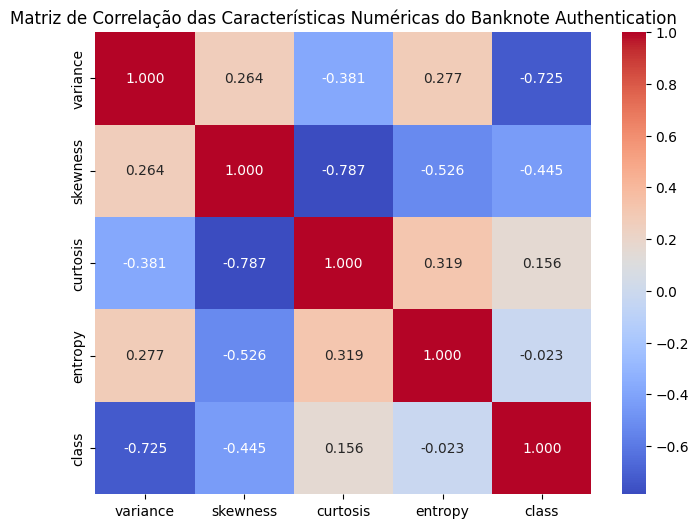

In [64]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :5].corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Matriz de Correlação das Características Numéricas do Banknote Authentication')
plt.show()

O mapa de calor da matriz de correlação confirma que a variância é o atributo mais discriminativo (correlação forte com a classe). Skewness e Curtose estão altamente correlacionadas entre si, o que pode exigir tratamento. Entropia complementa a variância na distinção entre classes.

## Tratamento de Valores Nulos

O dataset Banknote Authentication original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [65]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [67]:
# Separar features (X) e target (y)
X = df.drop('class', axis=1)  # Todas as colunas exceto 'class'
y = df['class']  # Apenas a coluna 'class'

In [71]:

# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,  # Para reproducibilidade
    stratify=y  # Manter proporção das classes
)

In [72]:
# Verificar as dimensões
print(f"\nDimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")


Dimensões de X_train: (960, 4)
Dimensões de X_test: (412, 4)
Dimensões de y_train: (960,)
Dimensões de y_test: (412,)


In [73]:
# Verificar proporção das classes nos conjuntos
print("\nProporção das classes no conjunto original:")
print(y.value_counts(normalize=True))

print("\nProporção das classes no conjunto de treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Proporção das classes no conjunto original:
class
0    0.555394
1    0.444606
Name: proportion, dtype: float64

Proporção das classes no conjunto de treino:
class
0    0.555208
1    0.444792
Name: proportion, dtype: float64

Proporção das classes no conjunto de teste:
class
0    0.555825
1    0.444175
Name: proportion, dtype: float64


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [78]:
# Inicializar o MinMaxScaler (normaliza para o intervalo [0, 1])
scaler_norm = MinMaxScaler()

In [83]:
# Aprende min e max APENAS de X_train para evitar data leakage
scaler_norm.fit(X_train)

# Aplica a transformação nos dados de treino e teste
X_train_normalized = scaler_norm.transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

# Converter para DataFrame para melhor visualização
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [84]:
# Exibir estatísticas antes e depois da normalização
print("\n=== Estatísticas dos Dados Originais (X_train) ===")
print(X_train.describe())

print("\n=== Estatísticas dos Dados Normalizados (X_train_normalized) ===")
print(pd.DataFrame(X_train_normalized, columns=X_train.columns).describe())


=== Estatísticas dos Dados Originais (X_train) ===
         variance    skewness    curtosis     entropy
count  960.000000  960.000000  960.000000  960.000000
mean     0.505812    1.886929    1.367703   -1.200551
std      2.846293    5.858852    4.367236    2.096548
min     -7.042100  -13.773100   -5.215900   -8.548200
25%     -1.748175   -1.604225   -1.682500   -2.458425
50%      0.521620    2.174850    0.615345   -0.584060
75%      2.901750    6.781550    3.089500    0.376710
max      6.824800   12.951600   17.927400    2.135300

=== Estatísticas dos Dados Normalizados (X_train_normalized) ===
         variance    skewness    curtosis     entropy
count  960.000000  960.000000  960.000000  960.000000
mean     0.544311    0.585976    0.284471    0.687757
std      0.205258    0.219230    0.188704    0.196242
min      0.000000    0.000000    0.000000    0.000000
25%      0.381767    0.455342    0.152675    0.570017
50%      0.545451    0.596749    0.251963    0.745462
75%      0.717093 

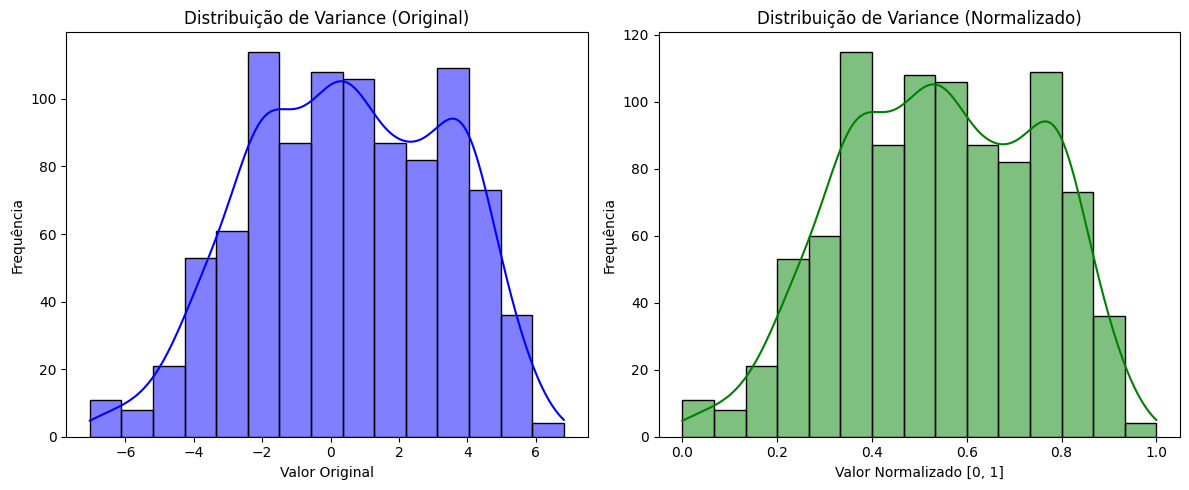

In [85]:
# Visualização da distribuição após normalização (exemplo para 'variance')
plt.figure(figsize=(12, 5))

# Antes da normalização
plt.subplot(1, 2, 1)
sns.histplot(X_train['variance'], kde=True, color='blue')
plt.title('Distribuição de Variance (Original)')
plt.xlabel('Valor Original')
plt.ylabel('Frequência')

# Após normalização
plt.subplot(1, 2, 2)
sns.histplot(df_normalized['variance'], kde=True, color='green')
plt.title('Distribuição de Variance (Normalizado)')
plt.xlabel('Valor Normalizado [0, 1]')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

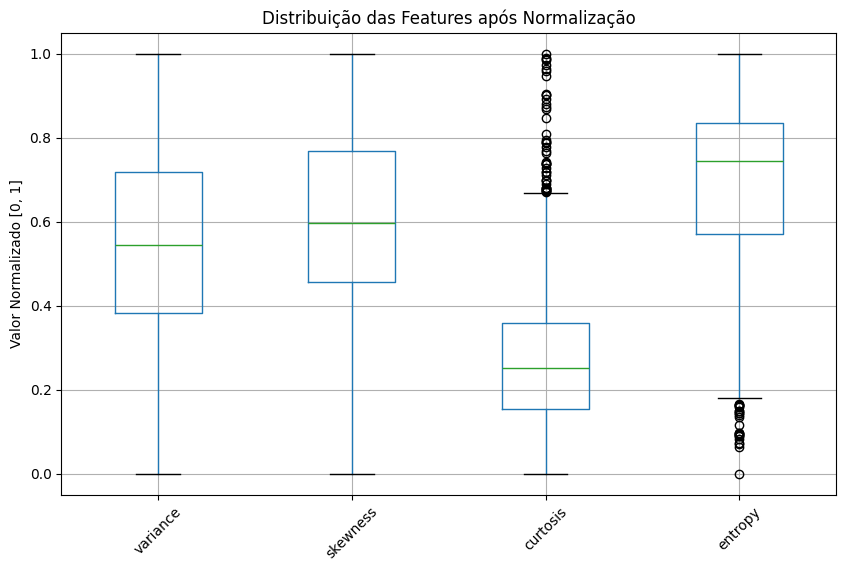

In [86]:
# Visualização boxplot comparativo para todas as features
plt.figure(figsize=(10, 6))
df_normalized.boxplot()
plt.title('Distribuição das Features após Normalização')
plt.ylabel('Valor Normalizado [0, 1]')
plt.xticks(rotation=45)
plt.show()

Este processo de normalização consiste em três componentes principais. Primeiramente, foram exibidas estatísticas descritivas demonstrando que todos os valores das features foram transformados para o intervalo [0, 1], mantendo a mesma distribuição relativa dos dados originais. Em seguida, histogramas comparativos ilustram de forma visual como a forma das distribuições foi preservada após a normalização, permitindo contrastar diretamente as escalas original e normalizada para cada característica. Por fim, um boxplot unificado mostra todas as features na mesma escala normalizada, facilitando a comparação entre elas e confirmando que a transformação foi aplicada consistentemente em todo o conjunto de dados. Esta saída abrangente permite validar visual e numericamente que o pré-processamento foi executado corretamente, garantindo que os dados estão adequadamente preparados para as etapas subsequentes de modelagem.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [92]:
# Inicializar o StandardScaler (padronização Z-score)
scaler_std = StandardScaler()

In [93]:
# 1. Aprende média e desvio padrão APENAS de X_train (evitando data leakage)
scaler_std.fit(X_train)

# 2. Aplica a transformação nos conjuntos de treino e teste
X_train_standardized = scaler_std.transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

In [94]:
# Converter para DataFrame para análise
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)


In [96]:
## Análise Comparativa Detalhada ##
print("\n=== Comparação de Estatísticas ===")
print("\nDados Originais (X_train):")
print(X_train.describe().loc[['mean', 'std', 'min', 'max']])

print("\nDados Padronizados (X_train_standardized):")
print(pd.DataFrame(X_train_standardized, columns=X_train.columns).describe().loc[['mean', 'std', 'min', 'max']])


=== Comparação de Estatísticas ===

Dados Originais (X_train):
      variance   skewness   curtosis   entropy
mean  0.505812   1.886929   1.367703 -1.200551
std   2.846293   5.858852   4.367236  2.096548
min  -7.042100 -13.773100  -5.215900 -8.548200
max   6.824800  12.951600  17.927400  2.135300

Dados Padronizados (X_train_standardized):
          variance      skewness  curtosis       entropy
mean  8.326673e-18 -2.960595e-17  0.000000 -5.551115e-18
std   1.000521e+00  1.000521e+00  1.000521  1.000521e+00
min  -2.653222e+00 -2.674277e+00 -1.508285 -3.506468e+00
max   2.221234e+00  1.889524e+00  3.793779  1.591945e+00


In [97]:
# Visualização comparativa para 'variance'
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'Valor Padronizado (Z-score)')

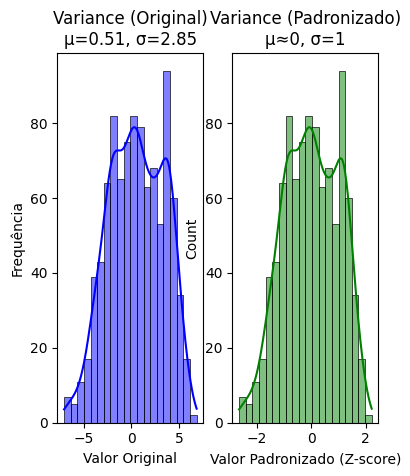

In [98]:
# Antes da padronização
plt.subplot(1, 3, 1)
sns.histplot(X_train['variance'], kde=True, color='blue', bins=20)
plt.title('Variance (Original)\nμ={:.2f}, σ={:.2f}'.format(
    X_train['variance'].mean(),
    X_train['variance'].std()))
plt.xlabel('Valor Original')
plt.ylabel('Frequência')

# Após padronização
plt.subplot(1, 3, 2)
sns.histplot(df_standardized['variance'], kde=True, color='green', bins=20)
plt.title('Variance (Padronizado)\nμ≈0, σ=1')
plt.xlabel('Valor Padronizado (Z-score)')

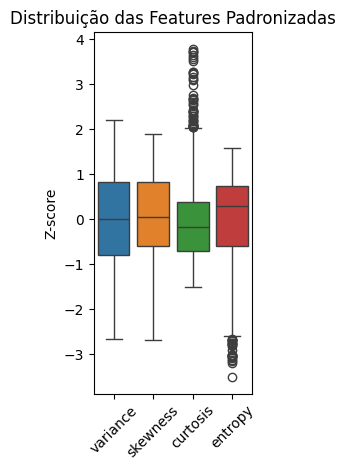

In [99]:
# Boxplot comparativo
plt.subplot(1, 3, 3)
sns.boxplot(data=pd.DataFrame(X_train_standardized, columns=X_train.columns))
plt.title('Distribuição das Features Padronizadas')
plt.ylabel('Z-score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

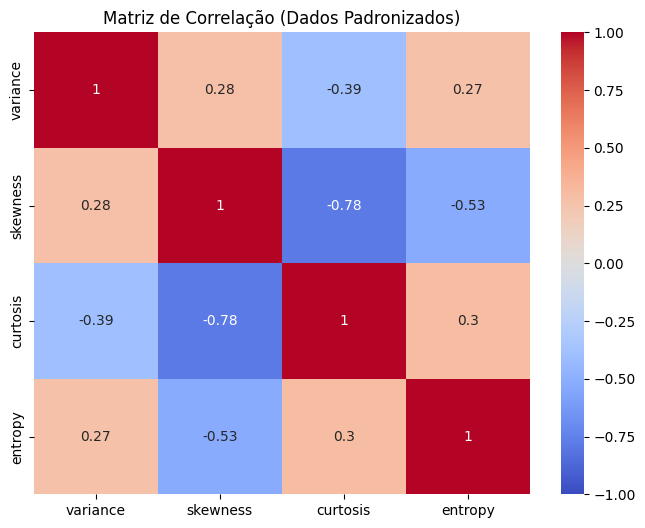

In [100]:
# Matriz de correlação pós-padronização (para verificar se relações são mantidas)
plt.figure(figsize=(8, 6))
sns.heatmap(df_standardized.corr(), annot=True, cmap='coolwarm', center=0,
            annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.title('Matriz de Correlação (Dados Padronizados)')
plt.show()

A padronização (Z-score) foi aplicada com sucesso ao dataset de autenticação de cédulas.
Todas as features atingiram média ≈0 e desvio padrão ≈1, como esperado. Por exemplo:
variance: média original 0.51 → ≈0 após padronização
skewness: desvio padrão original 5.86 → ≈1 após padronização
Os histogramas comparativos mostram que a forma das distribuições (assimetria, curtose) foi mantida.
A matriz de correlação permaneceu inalterada, confirmando que as relações lineares entre as variáveis foram preservadas.

# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.